In [2]:
# -*- coding: utf-8 -*-
#PHSX 218 Plotting Code
#Jaylene

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

#May or may not be using the python code to calculate your
#errors
#First define functions for the error analysis rules
#This can be copy/pasted from existing code

def rule2(c, m, A, dA):

    dQ = c*m*A**(m-1)*dA

    return dQ


def rule3(A,dA,B,dB):
    
    #Need to use NumPy's sqrt so it knows what to do with
    #arrays!
    dQ = np.sqrt((dA)**2+(dB)**2)

    return dQ


#Now you write rule 4



In [3]:
#----------------------------------------------------------#
#Create an array for each of our measured sets of data
#including the uncertainty in your y variable




#----------------------------------------------------------#

#all of the rest of this code is from last semester
#for plotting the points, best-fit line and calculating
#error in best-fit line

# All you need to do is ASSIGN VARIABLES and change plot title, etc #

x = np.array([-2.69563, -2.772589, -2.85597, -2.946942, -3.04703, -3.15825, -3.28341, -3.426515, -3.59357, -3.79424, -4.04555, -4.382026])
y = np.array([3.68888, 4.35671, 3.4012, 4.66344, 4.7185, 3.3322, 4.83628, 4.6052, 4.89784, 5.0876, 5.52943, 5.3936])
dy = np.array([0.18, 0.19, 0.18, 0.18, 0.18, 0.19, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18])

#------------------------------------------------------------
#       BEST FIT - MODIFY ONLY IF FITTING HIGHER-ORDER POLYNOMIAL
#------------------------------------------------------------

#Using the NumPy polynomial.polynomial.polyfit function to determine 
#the intercept and slope, b and m, of the best-fit line.
#The parameters are polyfit(x, y, degree of polynomial, weights)
#Only modify if need to change the degree of polynomial trying to fit.

b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy) 

#Using the best-fit slope and intercept values, write the equation of the
#least squares fit line so that it may be plotted on top of our data.  Only modify if
#fitting with a higher-order polynomial

fit = b+m*x

#calculate LLSFD(Linear Least Squares Fit Document) equation 2 for goodness of
#fit comparison. Do not modify.
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#Calculating error in slope and intercept.  Do not need to understand where
#these equations come from!

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D

D=Delta(x, dy)

dm = math.sqrt(1/D*sum(1/dy**2)) #error in slope
db = math.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#------------------------------------------------------------



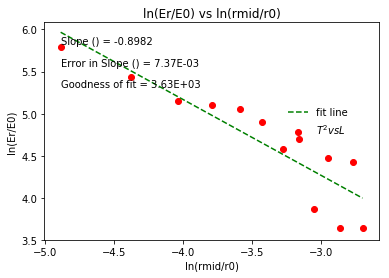

In [7]:
#------------------------------------------------------------
#           PLOTTING - MODIFY LABELS, MARKERS, ANNOTATIONS
#------------------------------------------------------------

#Change your labels!  Change your color and styles if you wish.
#Items enclosed in dollar signs are being written in LaTeX and
#will look like proper math expressions.

#Scatter plot x and y using red circle markers
plt.scatter(x, y, color='red', marker='o', label='$T^2 vs L$')

#Plot least squares fit line
plt.plot(x, fit, color='green', linestyle='--', label='fit line')

#Plot y error bars - do not need to modify
plt.errorbar(x, y, yerr=dy, xerr=None, fmt=None, label='_nolegend')

#Write x and y axes labels, title.  Modify these!
plt.xlabel('ln(rmid/r0)') #x-axis label
plt.ylabel('ln(Er/E0)') #y-axis label
plt.title('ln(Er/E0) vs ln(rmid/r0)') #plot title

#-----
#Pyplot's annotate allows you to place text on the plot and control the location of it.
#Write the values for slope, error in slope, intercept, error in intercept
#and goodness of fit value on plot.  Need to modify the units for these values
#as well as the format of the value, i.e. the number of digits past the decimal,
#or formatting the number in scientific notation.
#The general method for formatting a value is
#'value = {value:.{digits}f}'.format(value=m, digits=4)
#In the format command you assign the value to the variable you are trying to
#format, in this case m (the slope).  And then you assign the number of digits
#past the decimal you would like to display, in this case, 4.

#If you'd like to display your result in scientific notation, rather than using
#{digits}f (where f stands for 'fixed point') use E for exponent notation as in
#{digits}E

plt.annotate('Slope  = {value:.{digits}f}'.format(value=m, digits=4),
             (0.05, 0.9), xycoords='axes fraction')
plt.annotate('Error in Slope  = {value:.{digits}E}'.format(value=dm, digits=2),
             (0.05, 0.8), xycoords='axes fraction')
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.70), xycoords='axes fraction')


#In the annotate example above, set the xycoords parameter to “axes fraction”
#so that annotate interprets your coordinates (0.05, 0.9) as fractions
#between 0 and 1 relative to the figure axes.
#The (0.05, 0.9) means to place the text horizontally 5% from the y-axis (left)
#and 90% from the x-axis (bottom).
#------

#Add legend identified by label in scatter and plot
#Do not need to modify unless it is in the way of other annotations

plt.legend(loc='upper left', bbox_to_anchor = (0.70, 0.65), frameon=False)

#Save the plot and display it.  Change the name to something appropriate
#It will be saved in the same folder as your code, and will be updated
#each time you run your code

#plt.savefig('SimplePendulum2016.png')
plt.show() #display all figures
